In [37]:
import pandas as pd
import quandl

In [38]:
import math, datetime

In [39]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pickle #saving the ml algorithm to save time on re-training algo

In [40]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
#importing google stock price dataset
df = quandl.get('WIKI/GOOGL', authtoken='xm288F4Hk8qMo1b8ye1E')

In [42]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [43]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [44]:
#Creating subset of the dataframe
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [45]:
#Feature engineering
df['HL_PCT'] = (df['Adj. High']- df['Adj. Low'])/(df['Adj. Low'])*100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100

In [46]:
#Creating dataset with new features
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [47]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [48]:
forecast_col = 'Adj. Close'

In [49]:
#Fill mising values
df.fillna(-99999, inplace=True)

In [50]:
#predicting 10% days in future
forecast_out = int(math.ceil(0.01*len(df)))

In [51]:
#creating prediction column 10% days in future
df['label'] = df[forecast_col].shift(-forecast_out)

In [52]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [53]:
df.dropna(inplace=True)
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [54]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,1.142604,-0.029718,1792602.0,1094.00
2018-01-31,1182.22,1.213207,-0.134312,1643877.0,1053.15
2018-02-01,1181.59,1.547000,0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.811604,-0.729098,5798880.0,1054.09
2018-02-05,1068.76,5.512236,-2.893850,3742469.0,1006.94


In [55]:
#defining X and y
X = np.array(df.drop(['label'],1))

In [56]:
#Scaling X
X= preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

In [57]:
y = np.array(df['label'])
y=y[:-forecast_out:]

In [58]:
print(len(X), len(y))

3354 3354


In [59]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [60]:
#predicting using linear regression
#clf = LinearRegression()
#clf.fit(X_train, y_train)

In [61]:
#Using pickle to save our trained algorithm
#with open('linearregression.pickle', 'wb') as f:
#    pickle.dump(clf, f) #dumping the trained classifier into f
    
pickle_in =open('linearregression.pickle','rb') #opening the pickle file
clf=pickle.load(pickle_in) 

    

In [62]:
accuracy = clf.score(X_test, y_test)
#accuracy

In [63]:
#Using svm regression
clf2= svm.SVR()
clf2.fit(X_train, y_train)
accuracy2 = clf2.score(X_test, y_test)
accuracy2

0.8176940383913938

In [64]:
forecast_set = clf.predict(X_lately)

In [65]:
print(forecast_set, accuracy, forecast_out)

[1082.03111288 1096.51702767 1110.03763145 1104.7481249  1098.29940733
 1096.08558155 1094.67642393 1090.90360364 1085.0830927  1080.59600065
 1078.73163363 1097.46710224 1116.09707611 1121.37406191 1136.11597134
 1140.35468877 1138.55774589 1136.26685133 1137.98540921 1155.90114271
 1155.41910537 1164.96138681 1161.61185588 1169.95605563 1189.94698222
 1203.14723258 1196.94591711 1209.02507409 1213.78113287 1213.28902426
 1204.04160148 1208.89396879 1207.83294715 1143.21942394 1087.51848537] 0.9754683668154345 35


In [66]:
df['Forecast'] = np.nan

In [67]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix= last_unix+ one_day

In [68]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]

In [69]:
df.columns

Index(['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume', 'label',
       'Forecast'],
      dtype='object')

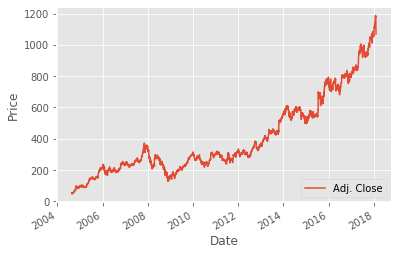

In [70]:
df['Adj. Close'].plot()
df['Forecast'].plot
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()